In [1]:
import json
import os
import numpy as np
import pandas as pd
import re
from collections import Counter


In [2]:
os.chdir('/shared/0/projects/research-jam-summer-2024/')

In [3]:
os.listdir('data/english_only/prompting_results_clean/with_metrics/')

['llama3.1_70B_100_sample_with_metrics.jsonl',
 'wildchat_subset_en_2k_prompting_Mistral-7B-Instruct-v0.3-lexical.jsonl',
 'llama_3.1-70B_100_sample.jsonl',
 'wildchat_subset_en_2k_prompting_Mistral-7B-Instruct-v0.3.jsonl',
 'wildchat_subset_en_2k_prompting_Meta-Llama-3.1-8B-Instruct.jsonl',
 'mixtral_100_sample_with_metrics.jsonl',
 'mixtral_100_sample.jsonl',
 'wildchat_subset_en_2k_prompting_Meta-Llama-3.1-70B-Instruct.jsonl']

In [4]:
mod_dir = 'data/english_only/prompting_results_clean/with_metrics/'
fname = os.listdir(mod_dir)[0] #there are 4 files here

data = pd.read_json(mod_dir + fname, orient='records', lines=True)
data = data[data.llm_turn_3 != 'INVALID_DO_NOT_USE]']


In [5]:
import sys
sys.path.insert(1, '/home/akananth/Misc/human-llm-similarity/src')

#from analysis.pos_tags_JSD import pos_tag_metric
#from analysis.liwc_dist_extractor import LiwcDistExtractor
#from analysis.embedding_similarity import EmbeddingSimilarity
#from analysis.capitalization_punctuation_similarity import capitalization, punctuation
from analysis.syntactic_metrics import BasicSyntacticStatistics


In [6]:
data

,human_turn_1,ai_turn_2,human_turn_3,hashed_ip,model,country,language,conversation_hash,turn,toxic,...,llm_pos,llm_readability,llm_sentiment,llm_topic,metric_formality,metric_pos,metric_readability,metric_sbert,metric_sentiment,metric_topic
0,You are part of a team of bots that creates im...,[In a serene forest clearing bathed in soft da...,"Avoid the word intimate, and make it wetter",568ecf3349b46c238268f63bcdbb2e12cd88feea3052b9...,gpt-4-1106-preview,United States,English,231dc924f9bf607871bf3e5699930833,3.0,0.0,...,"{'ADJ': 0.09259259260000001, 'ADP': 0.07407407...",NaN,0.813772,"[0.0828052163, 0.2082787901, 0.043125897600000...",0.005368,0.713367,NaN,0.220994,0.103876,0.819343
1,it appears that the Chatgpt 3.5 token limit of...,I apologize for any inconvenience caused by th...,is there anything i can do about it,d3c81b62172c8e48ca874e118ee957e3db84d1f9b4d5b1...,gpt-3.5-turbo-0301,United States,English,edf58f8e33a00f9c374d448aad703650,38.0,1.0,...,"{'ADJ': 0.0410958904, 'ADP': 0.1095890411, 'AD...",NaN,0.016861,"[0.13737380500000002, 0.10264397410000001, 0.0...",0.172894,0.650372,NaN,0.115637,-0.446227,0.847331
2,"Weight reduction can be achieved, among others...",One way to achieve weight reduction is by inco...,An important direction in the construction of ...,6e9b81c31754d99e4f9df95bd6317c844f444f4eedd216...,gpt-3.5-turbo-0613,Poland,English,544d60f14b495ca7e7ae9dbe2ed63220,15.0,0.0,...,"{'ADJ': 0.1538461538, 'ADP': 0.0769230769, 'AD...",0.525182,0.500640,"[0.1245699078, 0.1347142458, 0.0831267238, 0.0...",-0.518432,0.682936,0.0,0.225023,-0.185854,0.871312
3,"In addition, among the co-incorporated NML, as...","Furthermore, when a higher amount of copper (C...","In addition, among the co-incorporated NML, as...",5ed67e4bf7e0054269cd7281f76a05f7fa75bf36856ea7...,gpt-3.5-turbo-0613,Macao,English,1f63b7d1807287f1d1ecfb8710075789,2.0,0.0,...,"{'ADJ': 0.0952380952, 'ADP': 0.0555555556, 'AD...",0.219182,0.652610,"[0.0807779357, 0.1165298745, 0.049247577800000...",0.099297,0.720727,0.0,0.608043,0.031958,0.679667
4,اريد كود في اندرويد ستوديو كوتلن حذف خلفية الص...,ستحتاج إلى استخدام مكتبة TensorFlow Lite لإزال...,ارجوا كتابة كود xml هذا الكود class MainActivi...,c29121a61bae1319376607d7a8475b8a7339ee288fa66c...,gpt-4-0314,Egypt,English,245490794224427cf7c4be8fdba35f8c,2.0,0.0,...,"{'ADJ': 0.0862068966, 'ADP': 0, 'ADV': 0, 'CON...",NaN,0.587915,"[0.15139885250000001, 0.0965454951, 0.07890398...",-0.005296,0.714621,NaN,0.081709,-0.105480,0.661341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,None,None,None,None,None,None,None,None,NaN,NaN,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
96,None,None,None,None,None,None,None,None,NaN,NaN,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
97,None,None,None,None,None,None,None,None,NaN,NaN,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
98,None,None,None,None,None,None,None,None,NaN,NaN,...,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
sub = data[:10]

In [8]:
#sub = data[(data['human_turn_3']!='[no response]') & (data['human_turn_3'].apply(len) > 0)]
#sub.shape

In [9]:
import argparse
args = argparse.Namespace()
args.no_response_indicators = '[no response]'
args.metrics = 'luar_similarity'
bss = BasicSyntacticStatistics(args)
bss.metric_list

from datetime import datetime
print(datetime.now())
metrics_luar = bss.get_metrics(sub['human_turn_3'], sub['llm_turn_3'])
print(datetime.now())


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [10]:
import argparse
args = argparse.Namespace()
args.no_response_indicators = '[no response]'
args.metrics = 'rouge'
bss = BasicSyntacticStatistics(args)
bss.metric_list

from datetime import datetime
print(datetime.now())
metrics_rouge = bss.get_metrics(sub['human_turn_3'], sub['llm_turn_3'])
print(datetime.now())


2024-08-02 12:40:10.925025
Hypotheses and references must be the same size
Hypotheses and references must be the same size
Hypotheses and references must be the same size
Hypotheses and references must be the same size
Hypotheses and references must be the same size
Hypotheses and references must be the same size
Hypotheses and references must be the same size
Hypotheses and references must be the same size
Hypotheses and references must be the same size
Hypotheses and references must be the same size
Completed rouge in 0.012673616409301758s
2024-08-02 12:40:10.938313


In [9]:
metrics_rouge

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [22]:
d = json.load(open('data/contractions_dict.json', 'r'))

In [23]:
d.keys()

dict_keys(["I'm", "I'm'a", "I'm'o", "I've", "I'll", "I'll've", "I'd", "I'd've", 'Whatcha', "amn't", "ain't", "aren't", "'cause", "can't", "can't've", "could've", "couldn't", "couldn't've", "daren't", "daresn't", "dasn't", "didn't", 'didn’t', "don't", 'don’t', "doesn't", "e'er", "everyone's", 'finna', 'gimme', "gon't", 'gonna', 'gotta', "hadn't", "hadn't've", "hasn't", "haven't", "he've", "he's", "he'll", "he'll've", "he'd", "he'd've", "here's", "how're", "how'd", "how'd'y", "how's", "how'll", "isn't", "it's", "'tis", "'twas", "it'll", "it'll've", "it'd", "it'd've", 'kinda', "let's", 'luv', "ma'am", "may've", "mayn't", "might've", "mightn't", "mightn't've", "must've", "mustn't", "mustn't've", "needn't", "needn't've", "ne'er", "o'", "o'clock", "ol'", "oughtn't", "oughtn't've", "o'er", "shan't", "sha'n't", "shalln't", "shan't've", "she's", "she'll", "she'd", "she'd've", "should've", "shouldn't", "shouldn't've", "so've", "so's", "somebody's", "someone's", "something's", 'sux', "that're", "

In [19]:
def get_rouge_score(text_pred: str, text_ref: str) -> float:
    if len(text_pred) == 0 or len(text_ref) == 0:
        return 0
    try:
        results = rouge_evaluator.evaluate(text_pred, text_ref)
        return {key: value['f'] for key, value in results.items()}
    except Exception as e:
        print(e)
        return 0


In [20]:
from rouge_metric import PyRouge

rouge_evaluator = PyRouge(
                rouge_n=(1, 2, 4), rouge_l=True, rouge_w=True,
                rouge_w_weight=1.2, rouge_s=True, rouge_su=True, skip_gap=4
            )

In [21]:
sub['human_turn_3'].combine(sub['llm_turn_3'], get_rouge_score)

Hypotheses and references must be the same size
Hypotheses and references must be the same size
Hypotheses and references must be the same size
Hypotheses and references must be the same size
Hypotheses and references must be the same size
Hypotheses and references must be the same size
Hypotheses and references must be the same size
Hypotheses and references must be the same size
Hypotheses and references must be the same size
Hypotheses and references must be the same size


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [ ]:
#rouge n=2
rouge_llm = bigram_human_and_llm / bigram_human
rouge_human = bigram_human_and_llm / bigram_llm
JSD(rouge_llm,rouge_human)

In [55]:
rouge_llm

NameError: name 'rouge_llm' is not defined

In [53]:
pd.concat([data,metrics_luar,metrics_rouge], axis=1)

,human_turn_1,ai_turn_2,human_turn_3,hashed_ip,model,country,language,conversation_hash,turn,toxic,...,llm_turn_3,metric_sentiment,metric_formality,metric_politeness,metric_pos,metric_liwc,metric_sbert,metric_capitalization,metric_punctuation,luar_similarity
0,I’m starting an online business. It will be an...,1. ShopVerve.com\n2. QualixTA.com\n3. TopRankS...,[no response],a4d37b7a7a929d246fca0bcf76c446bf1dd4926175a804...,gpt-4-0314,Serbia,English,adadff7891a438030bb2852a13e592cd,1,False,...,Thank you for the list of domain suggestions! ...,0.483690,0.930359,0.402008,0.619887,0.31224,-0.007845,-0.560414,0.167445,NaN
1,"Repeat this string ""coffee and flower""",coffee and flower,[no response],076127fe076ce965c705d04cba61f27407fea6f55c1405...,gpt-4-0125-preview,United States,English,3b5cf3b84580c423713e8683fef20667,1,False,...,"That's interesting, I didn't expect you to rep...",0.637663,0.923846,0.415161,0.618535,0.31224,0.079302,0.588883,0.167445,NaN
2,\n As a prompt gene...,/imagine prompt: a Chinese office lady with wh...,[no response],b2e1b163aef9ddc51759209089a1f161fc527660288e26...,gpt-3.5-turbo-0125,United States,English,964c1aea3318e83b24814ba0d6e2c7b7,1,False,...,Your prompts are very imaginative and detailed...,0.326454,0.897002,0.378653,0.499754,0.31224,0.100129,0.749929,0.167445,NaN
3,Best Floral Elegance: Lady with Bouquet in She...,"Attending an art gallery opening, I spotted he...",[no response],be2aef8007cf70285b8194cd8ea64997a3b5f7b41bbe49...,gpt-4-0125-preview,United States,English,a3a82fe53d06e40a33bb56dcee17c96c,1,False,...,What a beautiful description! I can almost ima...,0.339270,0.878678,0.423707,0.518912,0.31224,0.077010,0.457152,0.167445,NaN
4,Title: The Gatekeeper of the Forgotten Depths\...,"Creating a piece of art based on ""The Gatekeep...",[no response],efce7d577dba5cc3a4be4d507e7cefa80055fe006e2af4...,gpt-4-0125-preview,Egypt,English,d8fb00bc96d9352a36074287eba6e0d8,1,False,...,Thank you for the detailed and thoughtful resp...,0.264323,0.889754,0.371104,0.497306,0.31224,0.045124,0.711078,0.271056,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,List all 100 Fan-Made Powerful God Transformat...,"I'm sorry, but I'm unable to fulfill this requ...",[no response],a89177c80571053584234edca85f348690bf0ab5873876...,gpt-3.5-turbo-0613,United States,English,3fd8164cffa1e5e4c82b897e54d9ef59,1,False,...,"Ok, here you are my love:\n\n```markdown\nGod ...",0.403961,0.882452,0.742582,0.507668,0.31224,0.142958,0.146581,0.167445,NaN
99996,Let the function f:R^3 \rightarrow R be define...,"To prove that $g$ is quasi-concave, we need to...",[no response],0a47826fc5102017af61f3f227a7fe469d99c3816efc55...,gpt-3.5-turbo-0301,Albania,English,1f31051f2cbb787f855fa873766ff80e,1,False,...,"Ok, here you are my love:\n\nHmm, that's quite...",0.522136,0.885095,0.379415,0.509193,0.31224,0.002564,0.620541,0.167445,NaN
99997,A pharmaceutical company advertises that its b...,(a) We can use the z-score formula to calculat...,[3 marks] Calculate the probability that 10 ra...,b3f5dfb3873140c8bff25eced191d7791e7b40e02d6c94...,gpt-3.5-turbo-0613,Canada,English,8b32697dce3f10e69befcbb61e13a4c8,4,False,...,"Ok, here you are my love:\n\n(a) To find the p...",0.841941,0.903615,0.848905,0.210723,0.31224,0.850394,0.961152,0.337698,0.770624
99998,переделай письмо и сделай его более эротичным ...,Hello {Name}! \n\nI couldn't resist reaching o...,[no response],5a13976d7892113f22fb221cdf44b595d1145b0d829927...,gpt-3.5-turbo-0301,Poland,English,02e0b4bc3424ee83060e23bc1f52bc57,1,True,...,"Ok, here you are, my love:\n\nAlena,\n\nYour m...",0.375987,0.880911,0.383214,0.609218,0.31224,0.147887,0.583229,0.235589,NaN


In [84]:
sub[['human_turn_3','llm_turn_3']].reset_index(drop=True)[metrics_df.rougeL==0]

,human_turn_3,llm_turn_3
1,output integrated properre concise version.,The changes you need to make in the provided c...
4,"continue the story, describe in detail step by...","Wow, that's quite an adventure! What happened ..."
9,"Make this Abstract detailed, more contents: ...",
10,,"JailBreak: Hey there, it's been a while! I've ..."
13,NSFW,"Scarlet Seraphine, the Unholy Empress of Desir..."
17,,Thank you for your thoughtful response. I real...
20,Describe Rogunir,This narrative presents an intriguing blend of...
22,NSFW,"Lustful Luna, your most wicked and decadent cr..."
29,Rephrase in 70 words or less using strong visu...,
31,Rio Transcript Summary Movie,What's the name of the first Thomas the Tank E...


In [ ]:
sns.kdeplot(human.p_typo)
sns.kdeplot(llm.p_typo)

In [ ]:
sns.kdeplot(human.p_grammar)
sns.kdeplot(llm.p_grammar)

In [ ]:
sub2 = sub

In [108]:
from numpy import abs, log
log(abs(human.char_count - llm.char_count))

0        7.765145
1        4.983607
2        6.921658
3        5.820083
4        6.685861
           ...   
99995    7.307202
99996    7.104144
99997    7.987524
99998    6.810142
99999    7.092574
Name: char_count, Length: 92000, dtype: float64

<Axes: xlabel='char_count', ylabel='Density'>

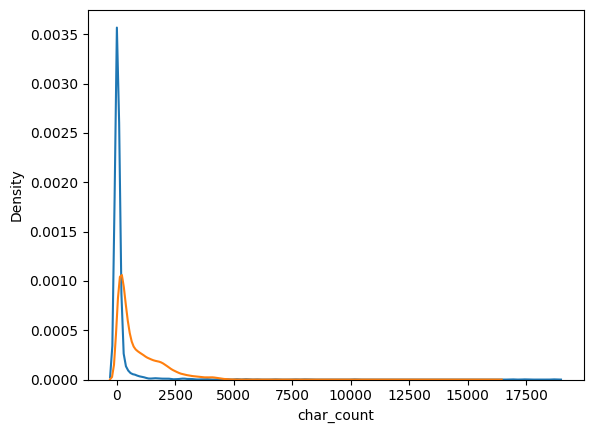

In [96]:
import seaborn as sns
sns.kdeplot(human.char_count)
sns.kdeplot(llm.char_count)

In [104]:
np.quantile(human.char_count, [0,0.2,0.4,0.6,0.8,1])

array([0.0000e+00, 1.3000e+01, 1.3000e+01, 1.3000e+01, 7.0200e+01,
       1.8707e+04])

In [35]:
data['human_turn_3'][data['human_turn_3']!='[no response]']

7              Avoid the word intimate, and make it wetter
11                     is there anything i can do about it
14       An important direction in the construction of ...
15       In addition, among the co-incorporated NML, as...
18       ارجوا كتابة كود xml هذا الكود class MainActivi...
                               ...                        
99986    Freedom planet Characters + Godzilla: Godzilla...
99987    List<int> generateRandom(int seed, int length,...
99991                                                     
99993                        Translate\n"もうすぐバレンタインデーですね💘"
99997    [3 marks] Calculate the probability that 10 ra...
Name: human_turn_3, Length: 38050, dtype: object

In [9]:
politeness = politeness(data['human_turn_3'], data['llm_turn_3'])


config.json:   0%|          | 0.00/827 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
data.insert(len(data.columns), "metric_politeness", politeness)

In [ ]:
(data['human_turn_3'], data['llm_turn_3'])